Elaborado por [Juan Galvis](https://scholar.google.com/citations?user=lbfc2joAAAAJ&hl=en).

## Prerequisitos
Usarememos numpy y linalg de scipy (que incluye mucho de numpy.linalg)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import scipy.io as io
import scipy.sparse as sp
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
import pprint
import urllib.request

 **scipy.linalg**  contiene todas las funciones de **numpy.linalg** y algunas otras. **scipy.linalg** usa BLAS/LAPACK por defecto. Se aconseja 
usar **scipy.linalg** a menos que se tenga una razón de peso para no hacerlo. 


### Normas 

In [ ]:
x=np.array([1,2,3,-4])
la.norm(x,1)

10.0

In [ ]:
la.norm(x,2) #Euclidiana

5.477225575051661

In [ ]:
la.norm(x,np.Inf)

4.0

In [ ]:
A=np.array([[0, 0, 1],
       [-1,  2,  2],
       [ 1, 2,  1]])
print(A)
print('La norma  2 de la matrix extendida a vector  es = ',la.norm(A)) #máximo valor singular
print('La norma de Frobenious es = ',la.norm(A,'fro')) # Frobenius
print('La norma subordinada 1 es = ',la.norm(A,1))
print('La norma subordinada 2 es = ', la.norm(A,2))
print('La norma subordinada Inf es = ', la.norm(A,np.Inf))

[[ 0  0  1]
 [-1  2  2]
 [ 1  2  1]]
La norma  2 de la matrix extendida a vector  es =  4.0
La norma de Frobenious es =  4.0
La norma subordinada 1 es =  4.0
La norma subordinada 2 es =  3.622222345931449
La norma subordinada Inf es =  5.0


## Métodos directos
Presentamos algunos comandos relacionados con la solución de sistemas lineales por métodos directos.

### Factorización $A=PLU$ y Cholesky

Calculemos la factorización $A=PLU$ de una matriz $4\times 4$.

In [ ]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = la.lu(A)
print('Matriz de permutación:\n',p,'\n')
print('Matriz triangular inferior\n',l,'\n')
print('Matriz triangular superior\n',u,'\n')

Matriz de permutación:
 [[ 0.0000  1.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  1.0000]
 [ 1.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  1.0000  0.0000]] 

Matriz triangular inferior
 [[ 1.0000  0.0000  0.0000  0.0000]
 [ 0.2857  1.0000  0.0000  0.0000]
 [ 0.7143  0.1200  1.0000  0.0000]
 [ 0.7143 -0.4400 -0.4615  1.0000]] 

Matriz triangular superior
 [[ 7.0000  5.0000  6.0000  6.0000]
 [ 0.0000  3.5714  6.2857  5.2857]
 [ 0.0000  0.0000 -1.0400  3.0800]
 [ 0.0000  0.0000  0.0000  7.4615]] 



Ahora calculemos la factorización para la matriz de Hilbert.

In [ ]:
H=la.hilbert(9)
print('H=\n',H)

H=
 [[ 1.0000  0.5000  0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111]
 [ 0.5000  0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000]
 [ 0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909]
 [ 0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833]
 [ 0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769]
 [ 0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714]
 [ 0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667]
 [ 0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667  0.0625]
 [ 0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667  0.0625  0.0588]]


In [ ]:
p, l, u = la.lu(H)
res=H-p@l@u
print('pA-LU=\n',res)
print('La norma Inf del residuo es ',la.norm(res,np.Inf))
print('La norma 2 del residuo es ', la.norm(res,2))

pA-LU=
 [[ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000  0.0000  0.0000 -0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000 -0.0000  0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000  0.0000]
 [ 0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000]]
La norma Inf del residuo es  5.551115123125783e-17
La norma 2 del residuo es  4.3091695835249104e-17


Calculemos la permutación de la factorización $A=PLU$ para una matriz diagonal dominante.

In [ ]:
A = np.array([[5, -1, 2, -1], [-1, 5, 0, 1], [0, -1, 4, 2], [1, 1, 1, 5]])
p, l, u = la.lu(A)
print(p)

[[ 1.0000  0.0000  0.0000  0.0000]
 [ 0.0000  1.0000  0.0000  0.0000]
 [ 0.0000  0.0000  1.0000  0.0000]
 [ 0.0000  0.0000  0.0000  1.0000]]


Calculemos ahora la factorización de Cholesky de una matri de la forma $A^TA$ con $A$ aleatoria. 

In [ ]:
A=np.random.rand(4,4)
B=A.transpose()@A
r=la.cholesky(B)
print(r)

[[ 1.0061  0.4779  1.3392  0.9703]
 [ 0.0000  0.6235  0.2981  1.0280]
 [ 0.0000  0.0000  0.6111  0.4311]
 [ 0.0000  0.0000  0.0000  0.3996]]


### Sistemas lineales

Resolver un sistema lineal general.

In [ ]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = la.solve(A, b)
res=b-A@x
print('x=',x.transpose())
print('res=',la.norm(res))


x= [ 2.0000 -2.0000  9.0000]
res= 0.0


Otro sistema lineal con una matriz mal condicionada es el siguiente.

In [ ]:
A=la.hilbert(15)
b=np.ones([15,1])
x=la.solve(A,b)
res=b-A@x
la.norm(res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: LinAlgWarning: Ill-conditioned matrix (rcond=8.18724e-19): result may not be accurate.
  This is separate from the ipykernel package so we can avoid doing imports until


1.8515526644951704e-08

Recuerde que $rcond=8.18724e-19$ es un estimado del recíproco del número de condición de la matriz del sistema lineal. En esta caso 
$\kappa(A)\approx 10^{19}$. Tenemos un residuo del orden de $1.85\times 10^{-8}.

##Iteraciones

In [ ]:
def jacobisolver(A,b,tol,Maxiter=25,x=None):
    # x inicial en caso no se tenga                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))
    #A=D-L-U y R=A-D=-L-U;                                                                                                                                                                
    D = np.diag(np.diag(A))

    #Interation                                                                                                                                                                          
    for i in range(Maxiter):
        r=b-np.dot(A,x)
        nr=la.norm(r)
        print('norm(r(',i,'))=',nr)
        if nr<tol:
          break        
        delta=la.solve(D, r)
        x = x+delta
    return x

A = np.array([[2.0,1.0],[5.0,7.0]])
b = np.array([11.0,13.0])
guess = np.array([1.0,1.0])

sol = jacobisolver(A,b,0.00001,Maxiter=100,x=guess)

print("A:")
print(A)

print("b:")
print(b)

print ("x:")
print(sol)

norm(r( 0 ))= 8.06225774829855
norm(r( 1 ))= 20.000510197574094
norm(r( 2 ))= 2.8793777672494825
norm(r( 3 ))= 7.143039356276462
norm(r( 4 ))= 1.0283492025891017
norm(r( 5 ))= 2.5510854843844535
norm(r( 6 ))= 0.36726757235325247
norm(r( 7 ))= 0.911101958708741
norm(r( 8 ))= 0.13116699012616342
norm(r( 9 ))= 0.32539355668169445
norm(r( 10 ))= 0.04684535361648634
norm(r( 11 ))= 0.11621198452917507
norm(r( 12 ))= 0.016730483434460305
norm(r( 13 ))= 0.04150428018899745
norm(r( 14 ))= 0.005975172655166063
norm(r( 15 ))= 0.014822957210355727
norm(r( 16 ))= 0.002133990233987848
norm(r( 17 ))= 0.0052939132894127576
norm(r( 18 ))= 0.0007621393692812169
norm(r( 19 ))= 0.0018906833176474099
norm(r( 20 ))= 0.0002721926318847325
norm(r( 21 ))= 0.0006752440420146464
norm(r( 22 ))= 9.721165424498798e-05
norm(r( 23 ))= 0.00024115858643596378
norm(r( 24 ))= 3.471844794583464e-05
norm(r( 25 ))= 8.612806658643426e-05
norm(r( 26 ))= 1.2399445696986865e-05
norm(r( 27 ))= 3.0760023784682106e-05
norm(r( 28 )

## Matrices dispersas

Consideremos un ejemplo de una matriz dispersa en https://suitesparse-collection-website.herokuapp.com/. En particular la matriz correspondiente a: *HB/1138_bus
S ADMITTANCE MATRIX 1138 BUS POWER SYSTEM, D.J.TYLAVSKY, JULY 1985.*

In [ ]:
import requests 
# Import to a python dictionary
url = "https://suitesparse-collection-website.herokuapp.com/mat/HB/494_bus.mat"
file = requests.get(url, allow_redirects=True)
print(file.content)
open('bus494.mat', 'wb').write(file.content)


b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Sep  6 04:04:21 2008                                                \x00\x01IM\x0f\x00\x00\x00\x901\x00\x00x\x9cl\x99\t\x98\xcf\xd5\x1a\xc7\xcf\x99"\xcb\xb5\x94+*\xcb\xdf\x12e\xcb\xd6X\x8a\xcc0\xf6a\x98\xb1\x8c\x16\xfb\x96]C\x08\xe5RH\xc8\x92\ne\xab\xe4\xda\x97H\\K\x91\xb1\x14\xb2\x8c\xdc\x9a\xac\xc9ruo\xe5\xb6\\\xe9~\xbf\xde\xf7}~\xe7z\xee<\xcf\xe79\xeb\xef\xf7;\xffs\xde\xf5L~\xe7\\fG\xe7r\xa2\xcc\x05\xe2\x9c\xfc\xe5\xd0\xb6\x0f\xb8\x03\xa4\x0c\x1d\xd4\xad\x7f\xcf\x01\x18\xbf\xfdf\x9b\xfd\xb5AF\xdf\x8c\xfe=\x9dK\x90\xa7\x07v\x1d\x80\x86\xeb\xdb\xe3f\xabG\xd7\x0c\xb6\xba\x0e\xcb\xe83h\xa8\xeb)\x9d\xfd\xfa\x0ed%?\x18\xe1\xa2\xef\xdf\xfe\x7f\xbe\xdfPK\xfe\x15\xd4vj,\xa1Qr\xb3\xb4\xb4\x84V\r\x93b\xc9\tim\x9bu\x8c\xc5j\xd6\xa9\x19Kl\x97\x1aKi\xdd!\xa9m,5=5-)\xb9R\xacQ\x95\xe6U\xd2\xd2[&\xb4Om\x91^)\xd6\xbc]\xcb\xf4X\xb5:\xb5\x1f\xaer\xf3}\xfc~\xac}\xf4\xfd\x1c\xf8\xc0\xf8\x9c\xd1\xf7\xafz\xc1\x07\xeb\xfa\xd3\xbdR/\x00*\x83<:~\x9b\xe

12824

Después de descargar el archivo .mat, exploramos la estructura de datos para localizar la matriz dispersa. Podemos mirar el patrón de dispersión (gráfico en dos dimensiones con un punto en el lugar de las entradas diferentes de cero).

<class 'numpy.ndarray'>


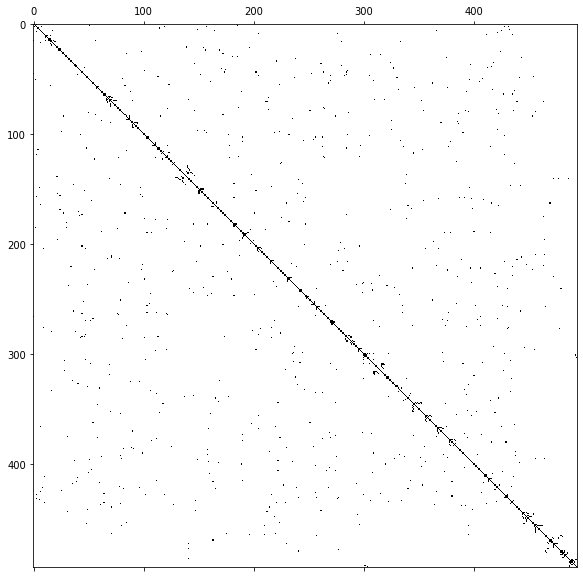

In [ ]:
mat = io.loadmat('bus494')
#print(mat)
A=mat['Problem']['A']
B=A[0]
C=B[0]
D=sp.csr_matrix.toarray(C)
print(type(D))
plt.figure(figsize=(10, 10))
plt.spy(D)
plt.show()

Observemos el efecto de la factorización LU en el patrón de dispersión.

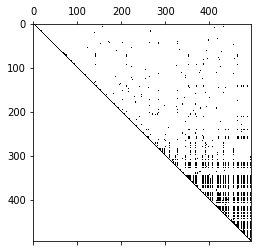

In [ ]:
p,l,u=la.lu(D)
plt.spy(u)

In [ ]:
print(np.linalg.cond(D))

2415411.0174664636


# Problemas


## Problema 1
Considere la matriz de segundas diferencias $A$ definida por 
$$a_{ij}=\left\{\begin{array}{cl}
-2, & i=j,\\
1, & |j-i|=1,\\
0, & |j-i|>1.
\end{array} \right.$$
Considere tambien la matriz de Frank de dimension $n\times n$, 
$$
A=\left(\begin{array}{cccccccccc}
n & n-1 & n-2 & n-3 & n-4& \dots 1\\
n-1 & n-1 &n-2 &n-3 & n-4 &\dots 1\\
0 & n-2 & n-2 & n-3 & n-4 & \dots 1\\
0&0&n-3 &n-3 & n-4&\dots 1 \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots
\end{array}\right)
$$

Note que en la diagonal principal, es decir, la diagonal 0 tenemos los números $n,n-1,\dots,1$, en la diagonal $1$ y $-1$ tenemos $n-1,n-2,\dots,1$. En la diagonal $k>1$ tenemos $n-k,n-k-1,\dots,1$ y en la diagonal $-k$ con $k>1$ tenemos entradas nulas. Esta matriz es un ejemplo de matriz de Hessenberg. 



1.   Que propiedades puede listar de las matrices de segundas diferencias y de Frank
2.   Investigue como medir el tiempo de ejecución de un comando en python o MatLab y 
calcule el tiempo de resolver un sistema  $Ax=b$ con $A$ una matriz de 
 segundas diferencias de segundo orden de dimension $n=2,4,8,1,32,64,128,\dots$. Tome  $b=(1,1,\dots,1)^T.$
3. Repita con la matriz de Frank.
4. Repita con la matriz de Hilbert.



## Problema 2
Considere la matriz de Hilbert $H(n)$ con $n=4,5,6,\dots$.


1.   Para $n=5,6,7,\dots$ calcule $\lambda(n)$ el menor valor propio de $H(n)$. Grafique $\lambda$ como funcion de $n$.
2.   Al intentar hacer a factorización de Cholesky de $H(20)$ en Octave/Matlab/Python la factorización no se calcula llevando a la conclución de que la representación numérica de $H(20)$ no es definida positiva. En Octave parece el error 
```
# error: chol : imput matrix must be positive definite
```
Verifique teoricamente  $H(n)$ es en realidad positiva definida (no necesita mostrar detalles aqui). Con ayuda del gráfico anterior y de lo estudiado sobre artimética de punto flotante explique esta situación.
3. Calcule $R(n)$ de la factorización de Cholesky de $H(n)=R(n)^TR(n)$ con $n=14,15,\dots,20$. Presente un gráfico de $t(n)=tr(R(n))$ como evidencia del cálculo.




## Problema 3
Considere la matriz de Hilbert $H(n)$ con $n=4,5,\dots,20$. Existe una fórmula exacta para la inversa de $H(n)$, implemente esta fórmula. Con el comando de MatLab o Python para calcular la inversa calcule $G=\mbox{inv}(H(n))$. Compare y comente los resultados.




## Problema 4
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sandia/oscil_dcop_21. El archivo .mat puede ser recuperado de 
https://suitesparse-collection-website.herokuapp.com/mat/Sandia/oscil_dcop_21.mat .
Gráfique el patrón de dispersión de esta matriz. Liste (con justificación numérica) las propiedades de esta matriz. 

# Problema 5
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sandia/oscil_dcop_21. Use un método iterativo (diferente de Jacobi) para resolver el sistema $Ax=b$
con $b=(1,1,\dots,1)$. 

## Problema 6
Considere la matriz https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015.  Que puede decir del problema asociado a esta matriz? 